In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

<div style="background-color:rgba(47, 83, 136, 0.75) ; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: white;">Carga de datos</h1>
</div>


We are merging multiple datasets 

In [2]:
account = pd.read_csv("Data/Customer Profiles/account_activity.csv")
customer = pd.read_csv("Data/Customer Profiles/customer_data.csv")
fraud = pd.read_csv("Data/Fraudulent Patterns/fraud_indicators.csv")
suspision = pd.read_csv("Data/Fraudulent Patterns/suspicious_activity.csv")
merchant = pd.read_csv("Data/Merchant Information/merchant_data.csv")
tran_cat = pd.read_csv("Data/Merchant Information/transaction_category_labels.csv")
amount = pd.read_csv("Data/Transaction Amounts/amount_data.csv")
anamoly = pd.read_csv("Data/Transaction Amounts/anomaly_scores.csv")
tran_data = pd.read_csv("Data/Transaction Data/transaction_metadata.csv")
tran_rec = pd.read_csv("Data/Transaction Data/transaction_records.csv")

In [3]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [4]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [5]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [6]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [8]:
transaction_data


,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [7]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


<div style="background-color:rgba(47, 83, 136, 0.75) ; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: white;">Exploración de datos</h1>
</div>


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [11]:
data.shape

(1000, 15)

In [12]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [13]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


<div style="background-color:rgba(47, 83, 136, 0.75) ; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: white;">Visualización de datos</h1>
</div>


## Countplot de variables categoricas

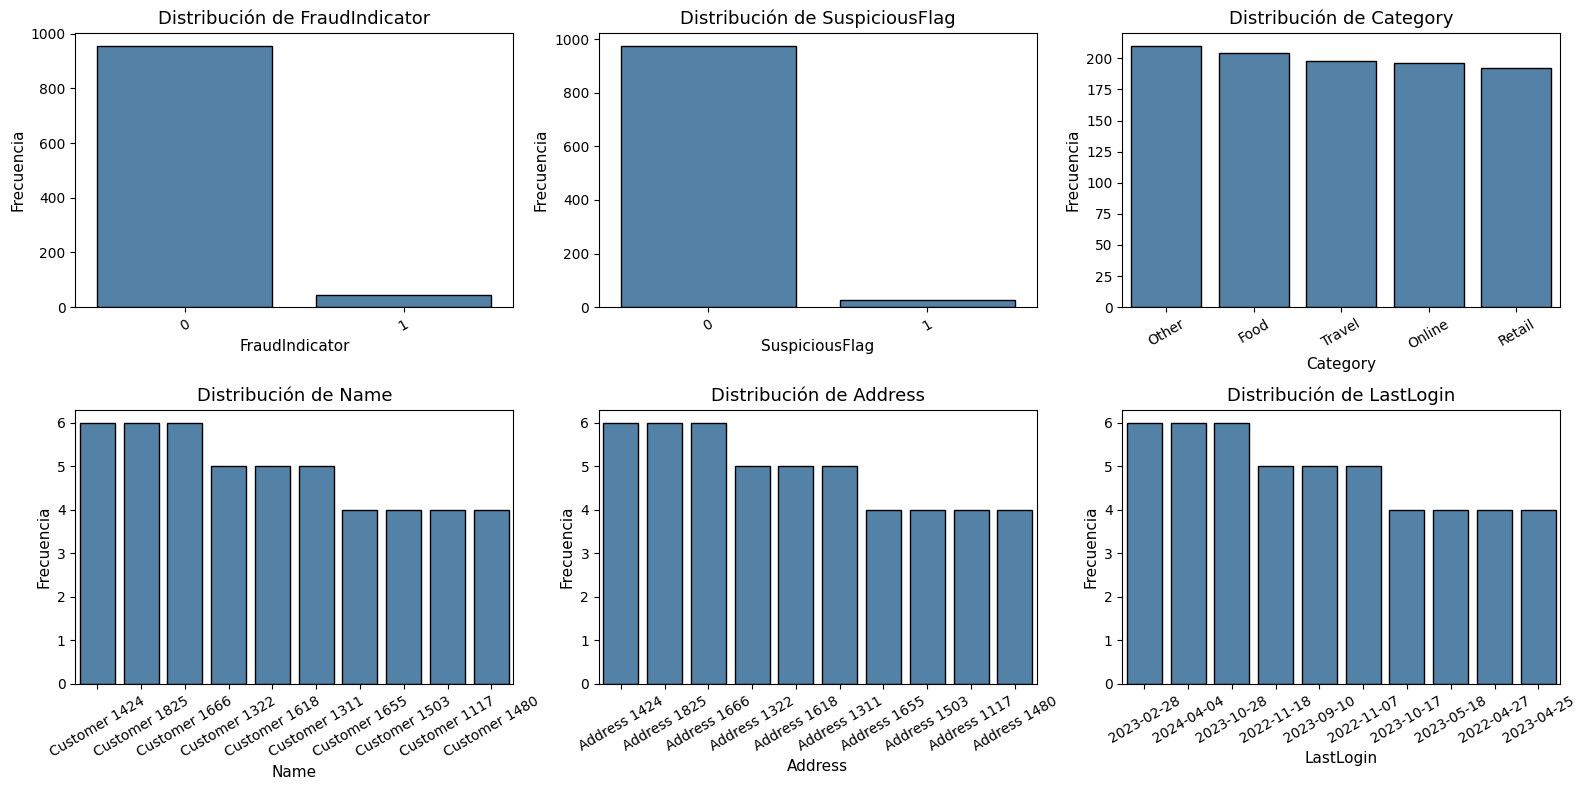

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas categóricas seleccionadas
categorical_columns = ["FraudIndicator", 'SuspiciousFlag', "Category", "Name", "Address", "LastLogin"]

# Definir número de columnas y calcular filas necesarias
ncols = 3
nrows = (len(categorical_columns) + ncols - 1) // ncols

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

# Graficar cada variable
for idx, column in enumerate(categorical_columns):
    top_10_values = data[column].value_counts().head(10)
    sns.countplot(
        x=column,
        data=data,
        order=top_10_values.index,
        color="steelblue",
        edgecolor='black',
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribución de {column}', fontsize=13)
    axes[idx].set_xlabel(column, fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].tick_params(axis='x', rotation=30)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Histplot para variables numéricas

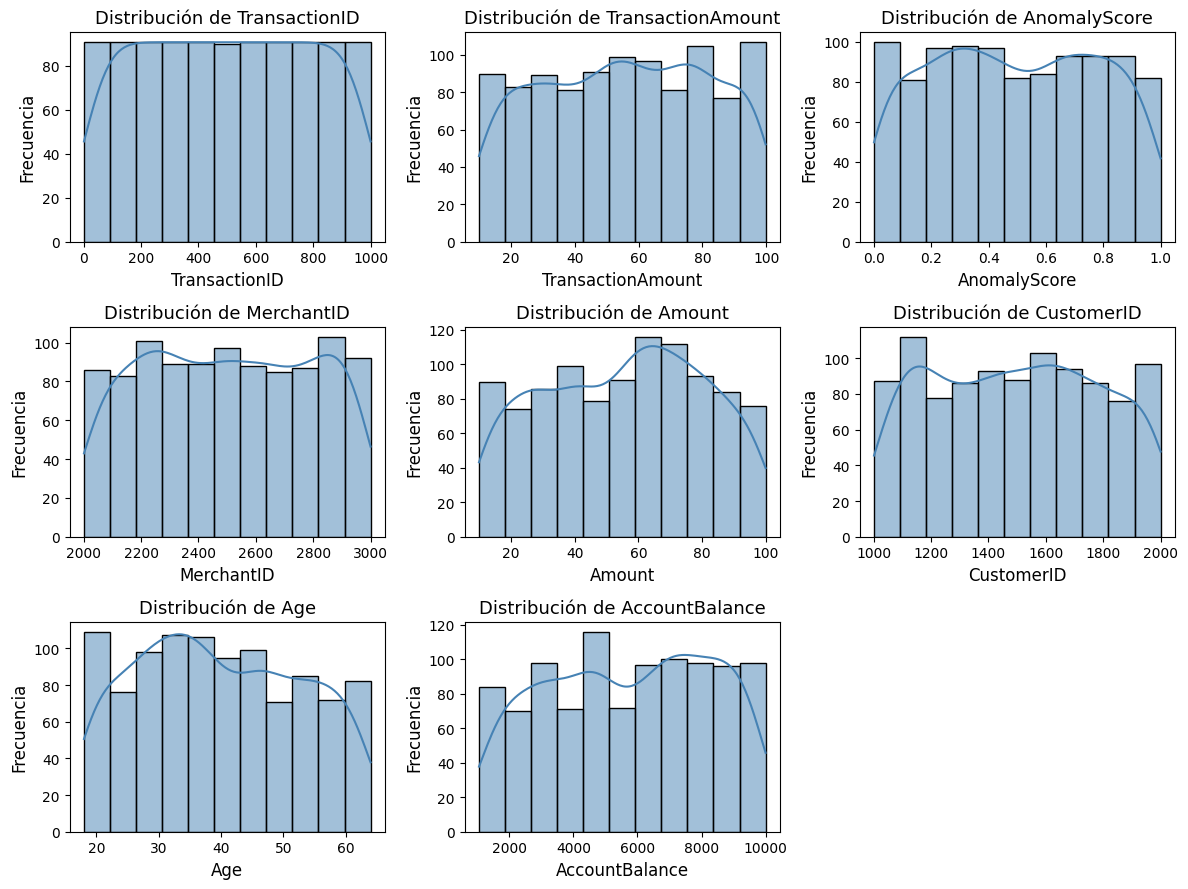

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas numéricas
numeric_columns = ['TransactionID', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance']

# Crear figura y subplots
fig, axes = plt.subplots(
    nrows=(len(numeric_columns) + 2) // 3,  # Ajuste pequeño para 3 columnas
    ncols=3,
    figsize=(12, 9)
)

# Aplanar el array de ejes
axes = axes.flatten()

# Recorrer variables numéricas
for idx, column in enumerate(numeric_columns):
    sns.histplot(
        data[column], 
        kde=True, 
        color="steelblue",
        ax=axes[idx]  
    )
    axes[idx].set_title(f'Distribución de {column}', fontsize=13)
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_ylabel('Frecuencia', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=0)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espacio
plt.tight_layout()
plt.show()


## BoxPlot de variables numericas

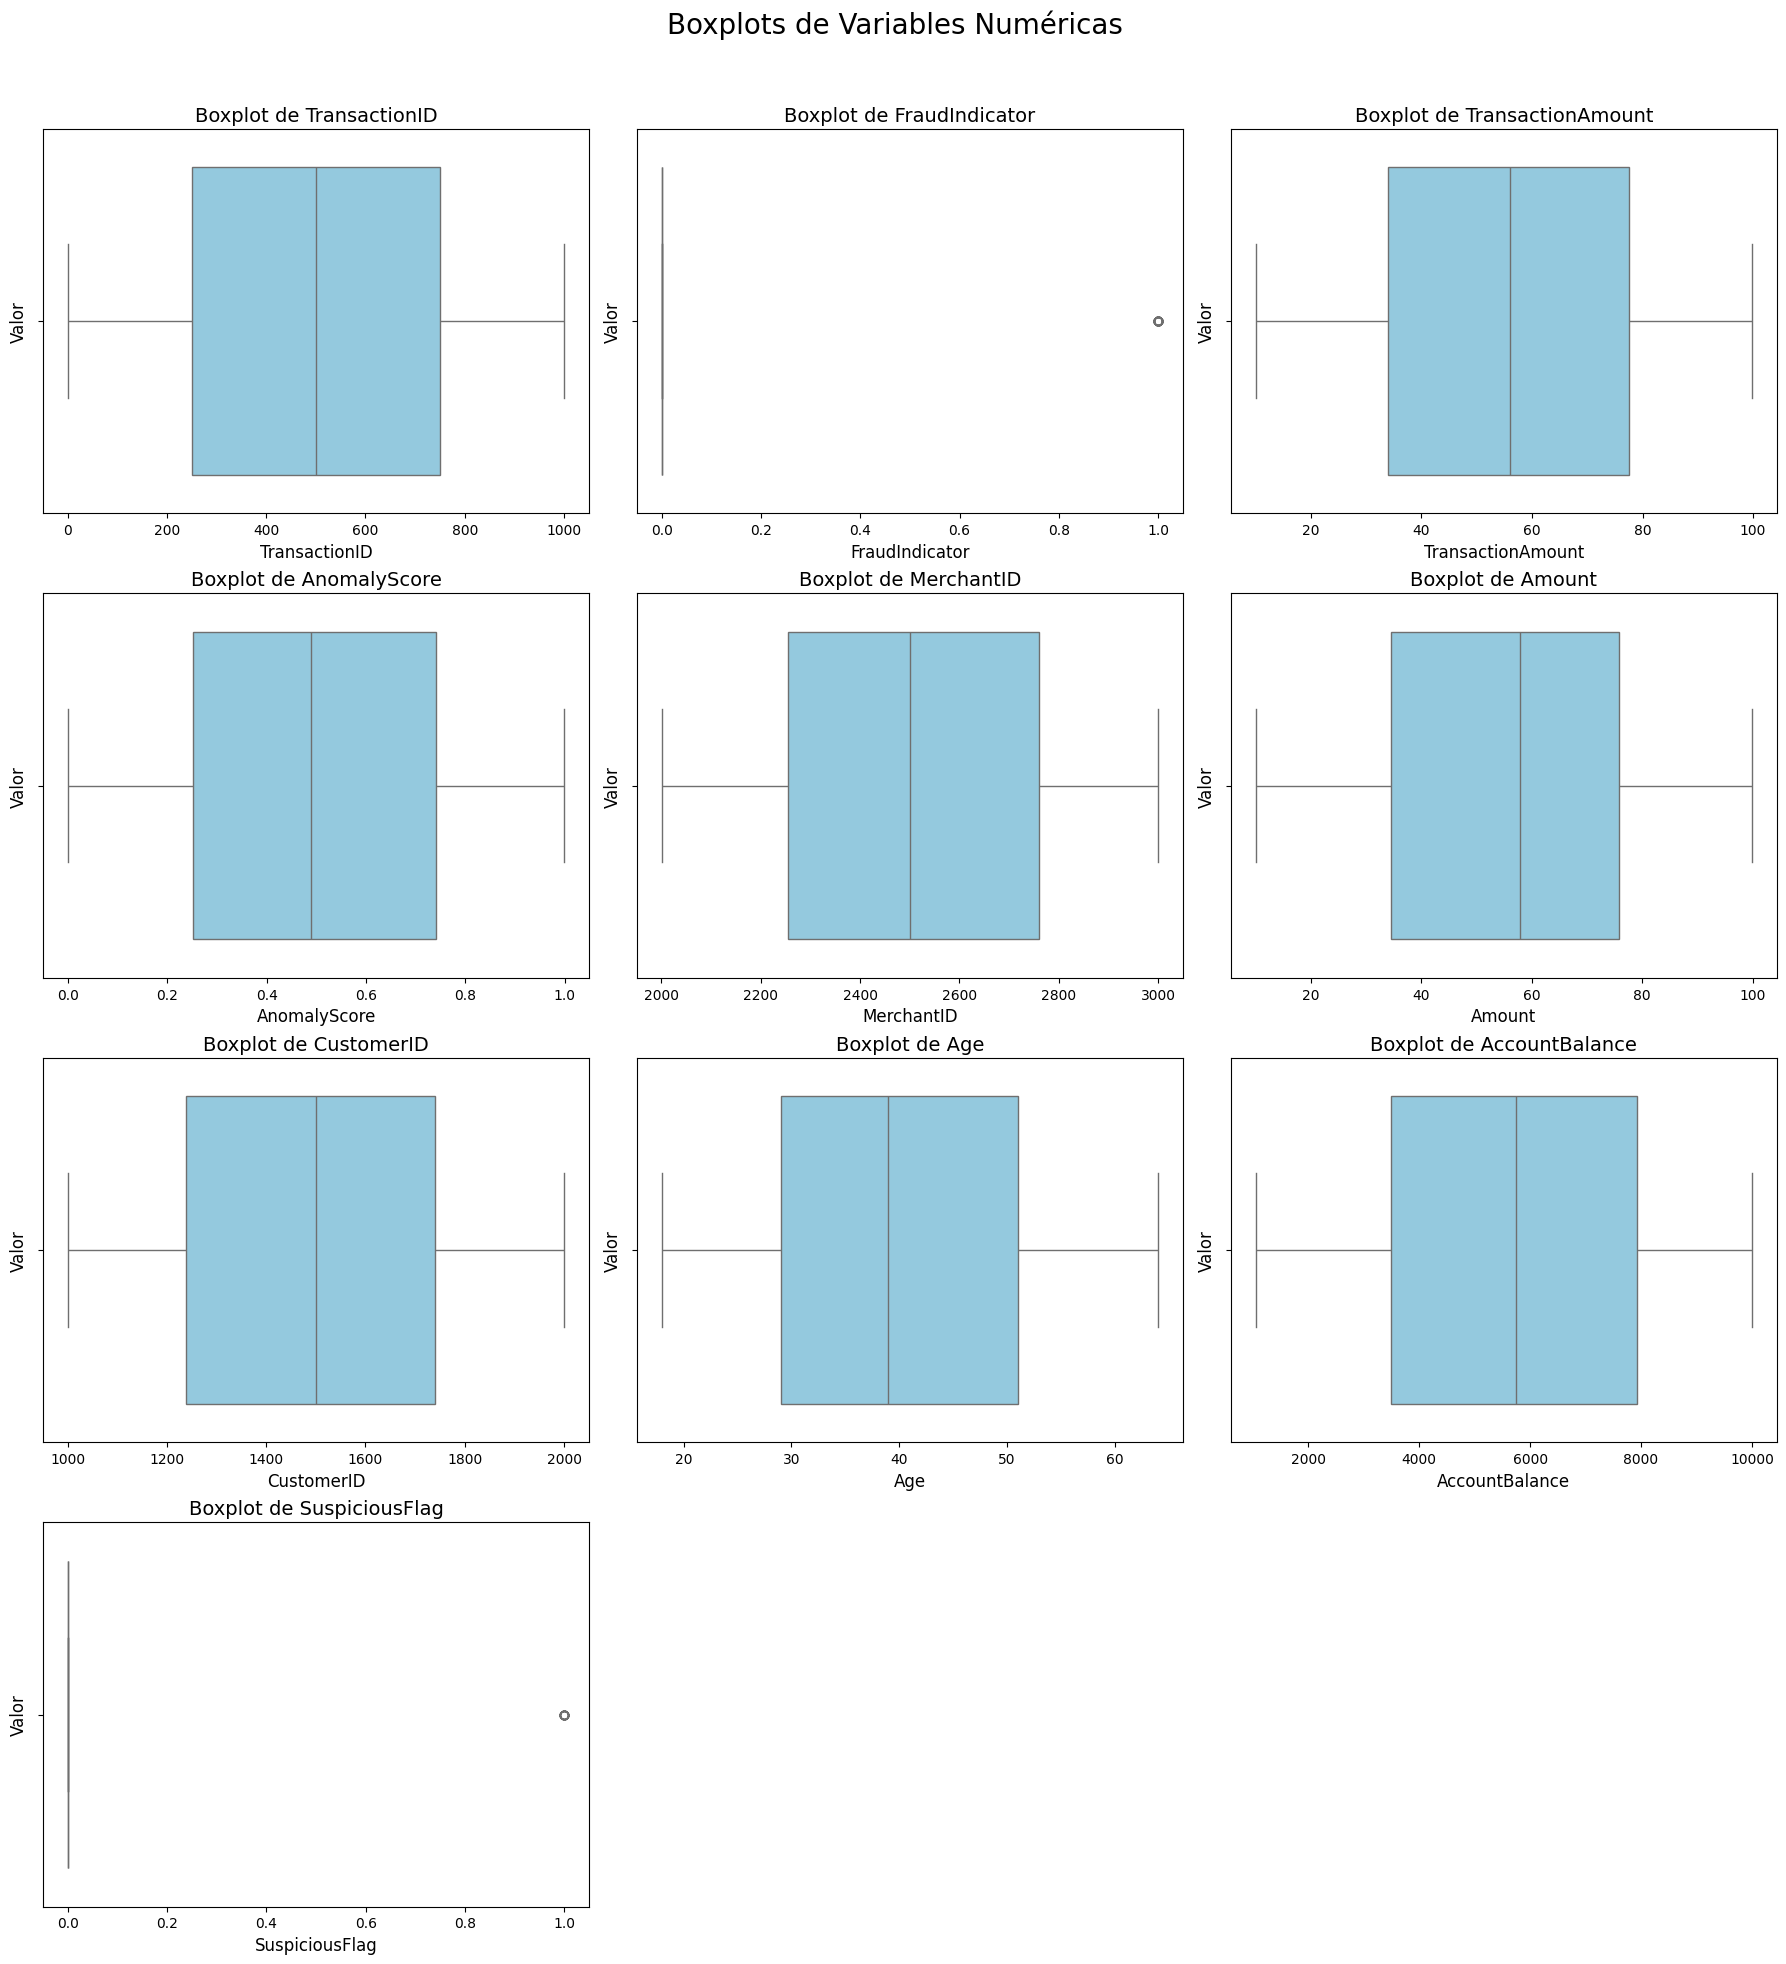

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Definir cantidad de filas y columnas
ncols = 3  # Dos boxplots por fila
nrows = (num_cols + ncols - 1) // ncols  # Redondeo para arriba

# Crear figura y subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()  # Aplanar para fácil iteración

# Dibujar los boxplots
for idx, column in enumerate(numeric_columns):
    sns.boxplot(
        x=data[column],
        color='skyblue',
        ax=axes[idx]
    )
    axes[idx].set_title(f'Boxplot de {column}', fontsize=14)
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_ylabel('Valor', fontsize=12)

# Si sobran ejes vacíos, eliminarlos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustes de espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Boxplots de Variables Numéricas', fontsize=20)
plt.show()


## Matriz de correlación a variables numericas

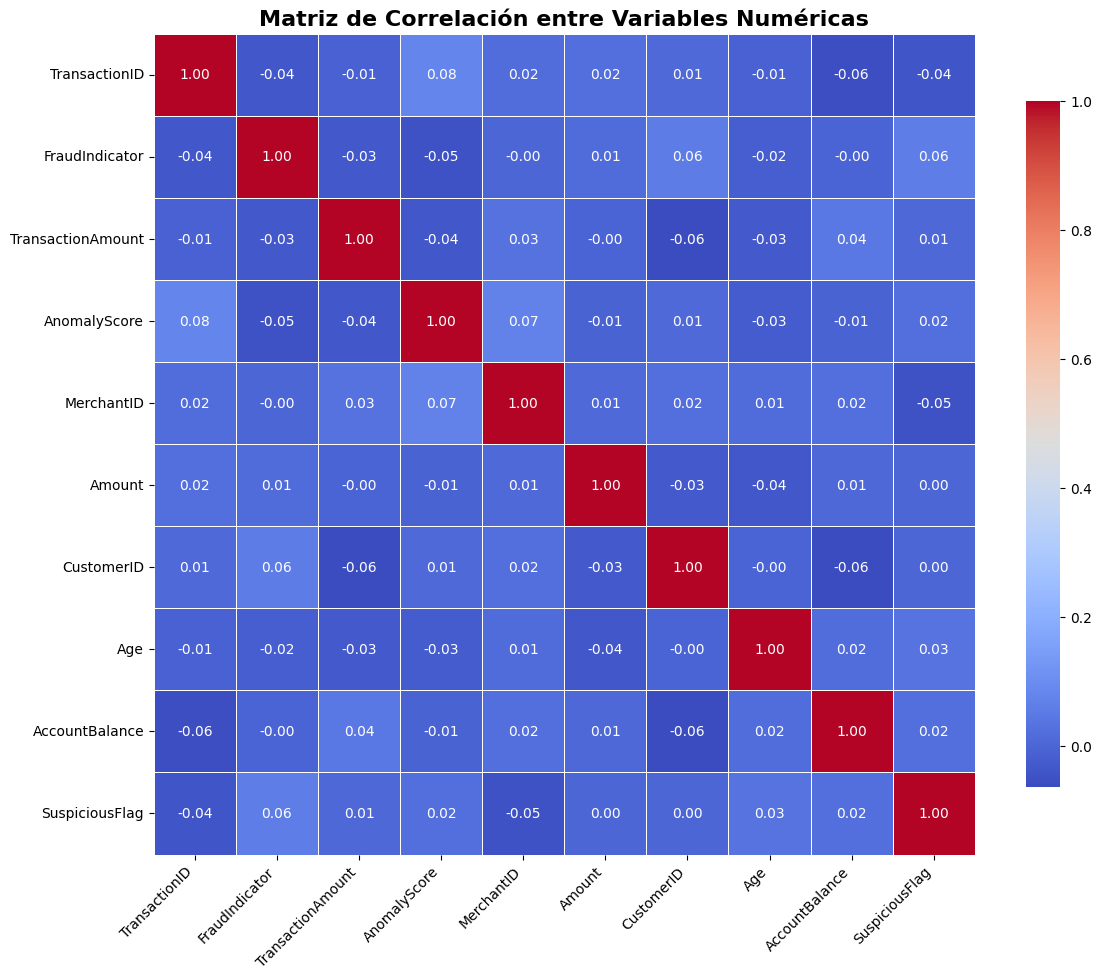

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Mostrar los números
    cmap='coolwarm',        # Mantener la misma paleta
    fmt=".2f",              # Formato de los números
    linewidths=0.5,         # Separación entre cuadros
    linecolor='white',      # Color de las líneas
    square=True,            # Que cada celda sea cuadrada
    cbar_kws={"shrink": .8} # Hacer la barra de colores más pequeña
)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para que no se superpongan
plt.yticks(rotation=0)               # Mantener las etiquetas de Y horizontales
plt.tight_layout()
plt.show()


<div style="background-color:rgba(47, 83, 136, 0.75) ; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: white;">Feature Engineering</h1>
</div>


Consiste en: Seleccionar y transformar las variables que se utilizarán en el modelo, Normalizar variables, Manipular datos categóricos, Crear nuevas variables a partir de las existentes

In [19]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model
columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0


In [20]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

In [21]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
#Converting TimeStamp to datetime format
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format. Converting it now.")
    data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

The 'Timestamp' column is not in datetime format. Converting it now.
FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [22]:
data1['Hour'] = data1['Timestamp1'].dt.hour
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [23]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0,2022-02-07 06:00:00,6,914
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0,2022-01-23 15:00:00,15,932


<div style="background-color:rgba(47, 83, 136, 0.75) ; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: white;">Modelado de datos</h1>
</div>


In [24]:
# Se eliminan las columnas que no son relevantes y se separa la variable objetivo en la variable Y
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [25]:
# Utiliza LabelEncoder para transformar valores categóricos (como texto) en números
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,0,90.422026,0.040817,53.683898,2869.689912,0,6,914
2,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
3,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
4,3,20.295348,0.476812,52.991184,9288.355525,0,15,932
...,...,...,...,...,...,...,...,...
995,2,89.972362,0.285603,29.328815,1678.514968,0,1,664
996,0,17.848481,0.029543,20.443811,6018.443647,0,4,270
997,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
998,3,47.958030,0.512483,96.299792,7067.831609,0,12,524


### Configuracion MLFLow

In [26]:
import subprocess

# Ejecutar MLFlow en segundo plano
# Simula ejecutar el comando "mlflow server --host 127.0.0.1 --port 8080"
process = subprocess.Popen(
    ["mlflow", "server", "--host", "127.0.0.1", "--port", "8080", "--backend-store-uri", "sqlite:///C:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlflowfiles/mlflow.db", "--default-artifact-root", "file:///C:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlflowfiles/artifacts"], 
    stdout=subprocess.PIPE,  # Captura la salida estándar
    stderr=subprocess.PIPE   # Captura errores
)

print(f"Servidor MLflow iniciado con PID {process.pid}")


Servidor MLflow iniciado con PID 14732


In [27]:
import mlflow
from mlflow.models import infer_signature

# Configurar SQLite como backend store
#mlflow.set_tracking_uri("sqlite:///C:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlflowfiles/mlflow.db")

# Definir la ubicación de los artefactos
#mlflow.set_registry_uri("file:///C:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlflowfiles/artifacts")

experiment_name = "logistic-regression-experiment"
#mlflow.create_experiment(experiment_name, artifact_location="file:///C:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlflowfiles/artifacts")
mlflow.set_experiment(experiment_name)


<Experiment: artifact_location='file:///c:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlruns/631189094949625404', creation_time=1741097941384, experiment_id='631189094949625404', last_update_time=1741097941384, lifecycle_stage='active', name='logistic-regression-experiment', tags={}>

### Train, test and splitting the data

In [28]:
#: Divide el dataset en dos subconjuntos:
# - 80% de los datos será para entrenar el modelo
# - 20% de los datos será para evaluar el modelo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
# Muestra el tamaño de los conjuntos de entrenamiento y prueba.
X_train.shape,Y_test.shape

((800, 8), (200,))

In [30]:
display(X_train)

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
450,3,41.099229,0.418539,70.797306,8961.011692,0,12,946
157,3,30.122574,0.661917,70.511320,6741.429339,0,13,614
283,0,20.433903,0.799903,99.243294,9084.791659,0,15,264
40,1,53.846707,0.124228,99.100427,7288.036638,0,21,116
800,4,38.692111,0.449617,73.556067,1150.295949,0,20,557
...,...,...,...,...,...,...,...,...
225,3,77.485946,0.096968,26.733576,4121.316625,0,21,149
550,1,40.852819,0.452326,72.731472,3812.531832,0,2,586
70,3,52.906735,0.310580,12.957372,6631.372808,0,11,761
883,2,77.595991,0.611870,24.962467,9182.873876,0,1,220


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 450 to 770
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           800 non-null    int32  
 1   TransactionAmount  800 non-null    float64
 2   AnomalyScore       800 non-null    float64
 3   Amount             800 non-null    float64
 4   AccountBalance     800 non-null    float64
 5   SuspiciousFlag     800 non-null    int64  
 6   Hour               800 non-null    int32  
 7   gap                800 non-null    int64  
dtypes: float64(4), int32(2), int64(2)
memory usage: 50.0 KB


In [32]:
display(Y_train)

450    0
157    0
283    1
40     0
800    0
      ..
225    0
550    0
70     0
883    0
770    0
Name: FraudIndicator, Length: 800, dtype: int64

### Modelo de regresión logística

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.935


#### Con MLFlow

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
from mlflow.models import infer_signature
experiment_name = "logistic_regression_experiment"
mlflow.set_experiment(experiment_name)

# Definir parámetros del modelo
params = {
    "solver": "lbfgs",
    "max_iter": 100,
    "random_state": 42
}

with mlflow.start_run():
    # Registrar parámetros
    mlflow.log_params(params)

    # Crear y entrenar el modelo
    model = LogisticRegression(**params)
    model.fit(X_train, Y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average="weighted")
    recall = recall_score(Y_test, y_pred, average="weighted")
    f1 = f1_score(Y_test, y_pred, average="weighted")

    # Registrar métricas
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Capturar firma del modelo
    signature = infer_signature(X_train, model.predict(X_train))

    # Registrar el modelo
    mlflow.sklearn.log_model(
    sk_model=model,
    artifact_path="logistic_regression_model",
    signature=signature)

    # Registrar el modelo en MLflow Model Registry
    mlflow.register_model(
        f"runs:/{mlflow.active_run().info.run_id}/logistic_regression_model",
        "logistic-regression-experiment"
    )
    
    print("registrado")


    print(f"Run ID: {mlflow.active_run().info.run_id}")  # Identificador único de este experimento

    print(f"info: {mlflow.active_run().info}")

registrado
Run ID: 004061ac328f43b5852d1bf5bba1c213
info: <RunInfo: artifact_uri='file:///c:/Users/camil/OneDrive/Escritorio/Tesis/proyectos/main/mlruns/307746205249028002/004061ac328f43b5852d1bf5bba1c213/artifacts', end_time=None, experiment_id='307746205249028002', lifecycle_stage='active', run_id='004061ac328f43b5852d1bf5bba1c213', run_name='stately-lamb-623', run_uuid='004061ac328f43b5852d1bf5bba1c213', start_time=1746016524362, status='RUNNING', user_id='Cami'>


Registered model 'logistic-regression-experiment' already exists. Creating a new version of this model...
Created version '4' of model 'logistic-regression-experiment'.


High accuracy is not often a good thing in a machine learning model as it states the problem of imbalanced dataset

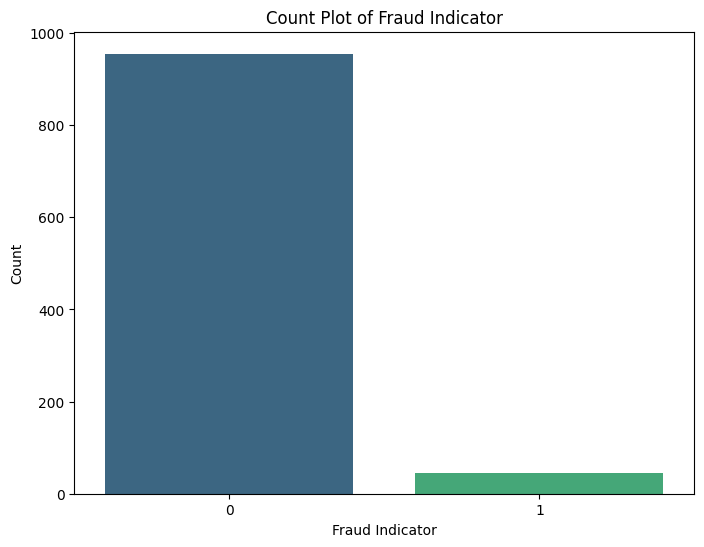

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


#### Logistic regression using sampled Data

Class distribution after oversampling: Counter({0: 955, 1: 955})


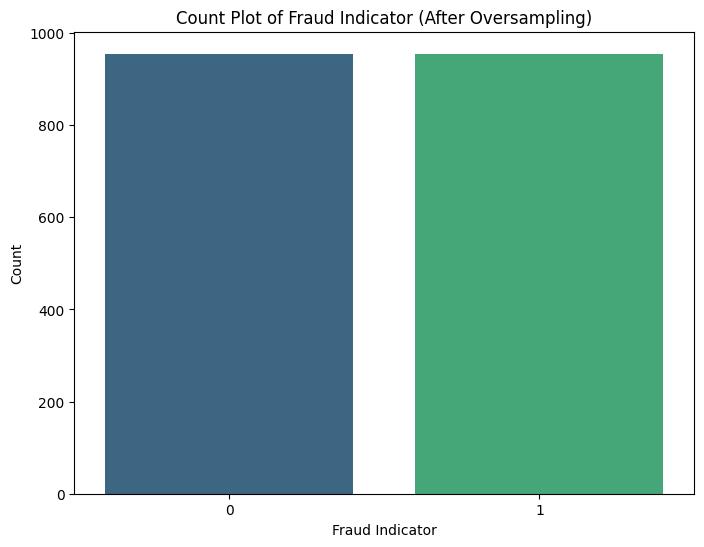

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


In [37]:
# Retraining Logistic regression using SAMPLED Data
model = LogisticRegression()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 0.595
Precision: 0.0641025641025641
Recall: 0.38461538461538464
F1 Score: 0.10989010989010987
Confusion Matrix:
[[114  73]
 [  8   5]]


In [38]:
# Logistic Regression model with Sample Data with Mlflow

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Iniciar un nuevo run en MLflow
with mlflow.start_run():
    model = LogisticRegression()

    # Train the model on the training data
    model.fit(X_resampled, y_resampled)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate and print various metrics to evaluate the model's performance
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average="weighted")
    recall = recall_score(Y_test, y_pred, average="weighted")
    f1 = f1_score(Y_test, y_pred, average="weighted")
    confusion = confusion_matrix(Y_test, y_pred)

    # Registrar métricas
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Capturar firma del modelo
    signature = infer_signature(X_train, model.predict(X_train))

    # Registrar el modelo
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="logistic_regression_model_withSampleData",
        signature=signature,
        registered_model_name="logistic-regression-withSampleData-experiment"
    )

    print(f"Run ID: {mlflow.active_run().info.run_id}")  # Identificador único de este experimento

Run ID: 225972ac84f24e18a9d42e61f6c65a4d


Registered model 'logistic-regression-withSampleData-experiment' already exists. Creating a new version of this model...
Created version '3' of model 'logistic-regression-withSampleData-experiment'.


#### Logistic Regression Model with Hyperparameter Tuning

Encontrar los valores óptimos de los hiperparámetros de un modelo de aprendizaje automático para mejorar su rendimiento.

In [39]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength (smaller values for stronger regularization)
    'solver': ['liblinear'],  # Solver for l1 regularization
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the resampled data
y_pred = best_model.predict(X_resampled)

# Calculate and print various metrics to evaluate the model's performance on the resampled data
accuracy = accuracy_score(y_resampled, y_pred)
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)
confusion = confusion_matrix(y_resampled, y_pred)

print("Model Evaluation Metrics on Resampled Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Model Evaluation Metrics on Resampled Data:
Accuracy: 0.6361256544502618
Precision: 0.6254826254826255
Recall: 0.6785340314136126
F1 Score: 0.6509291813159216
Confusion Matrix:
[[567 388]
 [307 648]]


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_classification_models(X_resampled, y_resampled):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Define a dictionary of classification models
    models = {
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(),
        "Support Vector Machine (SVM)": SVC(),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": confusion
        }
    
    return results

results = evaluate_classification_models(X_resampled, y_resampled)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()


Results for Decision Tree Classifier:
Accuracy: 0.8717277486910995
Precision: 0.8505154639175257
Recall: 0.8918918918918919
F1 Score: 0.870712401055409
Confusion Matrix: [[168  29]
 [ 20 165]]

Results for Random Forest Classifier:
Accuracy: 0.9240837696335078
Precision: 0.8823529411764706
Recall: 0.972972972972973
F1 Score: 0.9254498714652957
Confusion Matrix: [[173  24]
 [  5 180]]

Results for Support Vector Machine (SVM):
Accuracy: 0.5235602094240838
Precision: 0.5062240663900415
Recall: 0.6594594594594595
F1 Score: 0.5727699530516432
Confusion Matrix: [[ 78 119]
 [ 63 122]]

Results for K-Nearest Neighbors (KNN):
Accuracy: 0.8324607329842932
Precision: 0.7665198237885462
Recall: 0.9405405405405406
F1 Score: 0.8446601941747574
Confusion Matrix: [[144  53]
 [ 11 174]]

Results for Gradient Boosting Classifier:
Accuracy: 0.8664921465968587
Precision: 0.8018018018018018
Recall: 0.9621621621621622
F1 Score: 0.8746928746928746
Confusion Matrix: [[153  44]
 [  7 178]]



### XGBoost

In [41]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'subsample': [0.8, 1],  # Fracción de datos usada en cada árbol
    'colsample_bytree': [0.8, 1]  # Fracción de columnas usada en cada árbol
}

# Crear el modelo base
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Iniciar un experimento en MLflow
mlflow.set_experiment("XGBoost_GridSearch")

with mlflow.start_run():
    # Grid Search con validación cruzada
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    
    # Entrenar con distintas configuraciones
    grid_search.fit(X_train, Y_train)
    
    # Obtener la mejor configuración
    best_params = grid_search.best_params_
    print("Mejores hiperparámetros:", best_params)

    # Evaluar el modelo con la mejor configuración
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average="weighted")
    recall = recall_score(Y_test, y_pred, average="weighted")
    f1 = f1_score(Y_test, y_pred, average="weighted")

    print("Accuracy:", accuracy)

    # Registrar parámetros y métricas en MLflow
    mlflow.log_params(best_params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Guardar el modelo en MLflow
    mlflow.xgboost.log_model(best_model, "xgboost_model")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.965


2025/04/30 09:36:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Ranking Models perfromance
1. Random Forest Classifier
2. Gradient Boosting Algorithm
3. Decision Tree Classifier
4. K-Nearest Neighbours
5. Support Vector Machine (SVC)
6. Logistic Regression

Now we can HyperParameterTune the

## RandomForest CLassifier

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the resampled data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the best model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

# Calculate and print various metrics to evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Best Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar los datos (importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Evaluar
accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy (DNN):", accuracy[1])

Epoch 1/20
39/39 [==============================] - 2s 20ms/step - loss: 0.6612 - accuracy: 0.5998 - val_loss: 0.6228 - val_accuracy: 0.6634
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.6612 - val_loss: 0.5855 - val_accuracy: 0.7320
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5815 - accuracy: 0.6948 - val_loss: 0.5562 - val_accuracy: 0.7288
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5572 - accuracy: 0.7111 - val_loss: 0.5436 - val_accuracy: 0.7516
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7300 - val_loss: 0.5138 - val_accuracy: 0.7614
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5139 - accuracy: 0.7635 - val_loss: 0.5066 - val_accuracy: 0.7745
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.7643 - val_loss: 0.4915 - val_accuracy: 0.7745
Epoch 8/20
39/39 [=

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# Red Neuronal
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)
print("Neural Network Metrics:")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_nn))


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       197
           1       0.86      0.99      0.92       185

    accuracy                           0.92       382
   macro avg       0.92      0.92      0.92       382
weighted avg       0.93      0.92      0.92       382

ROC-AUC: 0.9184524626148992
12/12 [==============================] - 0s 2ms/step
Neural Network Metrics:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       197
           1       0.74      0.95      0.83       185

    accuracy                           0.82       382
   macro avg       0.84      0.82      0.81       382
weighted avg       0.84      0.82      0.81       382

ROC-AUC: 0.8208533406502951
